In [39]:
import rpy2.rinterface
%load_ext rpy2.ipython
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t as tdist
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std as pi

##In Python
##Read in the data
bikes = pd.read_csv('bike_share.csv', dtype=float)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [40]:
%%R
##In R
##Read in the data
bikes <- read.csv(file = "bike_share.csv", header = T)
n<-nrow(bikes)


In [41]:
##part a -- In Python
count = bikes["count"] # number of bikes rented
temp = bikes["temp"] # temperature
modelTemp = sm.OLS(count, sm.tools.tools.add_constant(temp), ).fit()
modelTemp.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2006.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:43:40   Log-Likelihood:                -71125.
No. Observations:               10886   AIC:                         1.423e+05
Df Residuals:                   10884   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -156.9856      7.945    -19.759      0.000    -172.560    -141.412
temp           5.0947      0.114     44.783      0.000       4.872       5.318
==============================================================================
Omnibus:                     1871.687   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3221.966
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       4.434   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#test h0 vs. ha
beta1_hatTemp = modelTemp.params[1]
sebeta1Temp = modelTemp.bse[1]
tstatTemp = beta1_hatTemp / sebeta1Temp
pvalTemp = 2 * (1 - tdist.cdf(np.abs(tstatTemp), df = 194))
print(tdist.cdf(np.abs(tstatTemp), df = 194))
print("The p-value for H0: beta1 = 0 is ", pvalTemp)

1.0
The p-value for H0: beta1 = 0 is  0.0


In [43]:
%%R
##part a -- In R
count <- bikes$count # number of bikes rented
temp <- bikes$temp # temperature
modelTemp <- lm(count ~ temp)
summaryTemp <- summary(modelTemp)
summaryTemp


Call:
lm(formula = count ~ temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.32 -112.36  -33.36   78.98  741.44 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -156.9856     7.9451  -19.76   <2e-16 ***
temp           5.0947     0.1138   44.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 166.5 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16



In [44]:
%%R
#test h0 vs. ha
beta1_hatTemp <- modelTemp$coefficients[2]
sebeta1Temp <- summaryTemp$coefficients[2,2]
tstatTemp <- beta1_hatTemp/sebeta1Temp
pvalTemp <- 2 * (abs(pt(tstatTemp, df = 194, lower.tail = FALSE)))
print(paste("The p-value for H0: beta1 = 0 is ", pvalTemp, sep = ""))

[1] "The p-value for H0: beta1 = 0 is 3.07679364621289e-104"


The regression coefficient $\beta_1 = 5.0947$ can be interpreted as for every 1 degree increase in temperature, the hourly count of bike rentals increases by 5.09. From these p-values, we reject the null hypothesis ($\beta_1 = 0$) in favor of the alternative hypothesis ($\beta_1 \neq 0$), as the likelihood we would see this data with $\beta_1 =  0$ is essentially 0. Bike rentals do appear to be significantly influenced by temperature.

In [45]:
##part b -- In Python
humidity = bikes["humidity"] # humidity
modelHumidity = sm.OLS(count, sm.tools.tools.add_constant(humidity), ).fit()
modelHumidity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1219.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.92e-253
Time:                        21:43:40   Log-Likelihood:                -71468.
No. Observations:               10886   AIC:                         1.429e+05
Df Residuals:                   10884   BIC:                         1.430e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        376.4456      5.545     67.890      0.000     365.577     387.315
humidity      -2.9873      0.086    -34.915      0.000      -3.155      -2.820
==============================================================================
Omnibus:                     2068.515   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3709.739
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                       4.525   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#test h0 vs. ha
beta1_hatHum = modelHumidity.params[1]
sebeta1Hum = modelHumidity.bse[1]
tstatHum = beta1_hatHum / sebeta1Hum
pvalHum = 2 * (1 - tdist.cdf(np.abs(tstatHum), df = 194))
print("The p-value for H0: beta1 = 0 is ", pvalHum)

The p-value for H0: beta1 = 0 is  0.0


In [47]:
%%R
##part b -- In R
humidity <- bikes$humidity # humidity
modelHumidity <- lm(count ~ humidity)
summaryHumidity <- summary(modelHumidity)
summaryHumidity


Call:
lm(formula = count ~ humidity)

Residuals:
    Min      1Q  Median      3Q     Max 
-375.45 -120.49  -41.86   82.15  734.73 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 376.44561    5.54494   67.89   <2e-16 ***
humidity     -2.98727    0.08556  -34.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 171.8 on 10884 degrees of freedom
Multiple R-squared:  0.1007,	Adjusted R-squared:  0.1006 
F-statistic:  1219 on 1 and 10884 DF,  p-value: < 2.2e-16



In [48]:
%%R
#test h0 vs. ha
beta1_hatHum <- modelHumidity$coefficients[2]
sebeta1Hum <- summaryHumidity$coefficients[2,2]
tstatHum <- beta1_hatHum/sebeta1Hum
pvalHum <- 2 * (1-pt(tstatHum, df = 194, lower.tail = FALSE))
print(paste("The p-value for H0: beta1 = 0 is ", pvalHum, sep = ""))

[1] "The p-value for H0: beta1 = 0 is 0"


Regression coefficient: $\beta_1 = -2.987$. Interpretation: for every 1 percent increase in relative humidity, bike rentals decrease by 2.987. We reject the null hypothesis ($\beta_1 = 0$) in favor of the alternative hypothesis ($\beta_1 \neq 0$), as the p-values indicate that the likelihood we would see this data with $\beta_1 =  0$ is essentially 0. Therefore, yes, bike rentals appear to be significantly influenced by relative humidity.

In [49]:
##part c -- In Python
windspeed = bikes["windspeed"] # windspeed in mph
modelWindspeed = sm.OLS(count, sm.tools.tools.add_constant(windspeed), ).fit()
modelWindspeed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     113.0
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           2.90e-26
Time:                        21:43:40   Log-Likelihood:                -71989.
No. Observations:               10886   AIC:                         1.440e+05
Df Residuals:                   10884   BIC:                         1.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.7876      3.212     50.682      0.000     156.492     169.084
windspeed      2.2491      0.212     10.630      0.000       1.834       2.664
==============================================================================
Omnibus:                     2086.612   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3633.799
Skew:                           1.247   Prob(JB):                         0.00
Kurtosis:                       4.338   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
beta1_hatWind = modelWindspeed.params[1]
sebeta1Wind = modelWindspeed.bse[1]
tstatWind = beta1_hatWind / sebeta1Wind
pvalWind = 2 * (1 - tdist.cdf(np.abs(tstatWind), df = 194))
print("The p-value for H0: beta1 = 0 is ", pvalWind)

The p-value for H0: beta1 = 0 is  0.0


In [51]:
%%R
##part c -- In R
windspeed <- bikes$windspeed # windspeed
modelWindspeed <- lm(count ~ windspeed)
summaryWindspeed <- summary(modelWindspeed)
summaryWindspeed


Call:
lm(formula = count ~ windspeed)

Residuals:
    Min      1Q  Median      3Q     Max 
-274.74 -145.29  -48.53   92.48  807.21 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 162.7876     3.2120   50.68   <2e-16 ***
windspeed     2.2491     0.2116   10.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 180.2 on 10884 degrees of freedom
Multiple R-squared:  0.01028,	Adjusted R-squared:  0.01018 
F-statistic:   113 on 1 and 10884 DF,  p-value: < 2.2e-16



In [52]:
%%R
#test h0 vs. ha
beta1_hatWind <- modelWindspeed$coefficients[2]
sebeta1Wind <- summaryWindspeed$coefficients[2,2]
tstatWind <- beta1_hatWind/sebeta1Wind
pvalWind <- 2 * (abs(pt(tstatWind, df = 194, lower.tail = FALSE)))
print(paste("The p-value for H0: beta1 = 0 is ", pvalWind, sep = ""))

[1] "The p-value for H0: beta1 = 0 is 4.31281706708649e-21"


The regressionn coefficient $\beta_1 = 2.2491$ means as the windspeed increases by 1 mile per hour, the number of bike rentals increases by 2.2491. We reject the null hypothesis ($\beta_1 = 0$) in favor of the alternative hypothesis ($\beta_1 \neq 0$), as the p-values indicate that the likelihood we would see this data with $\beta_1 =  0$ is essentially 0. Therefore, yes, bike rentals appear to be significantly influenced by windspeed.

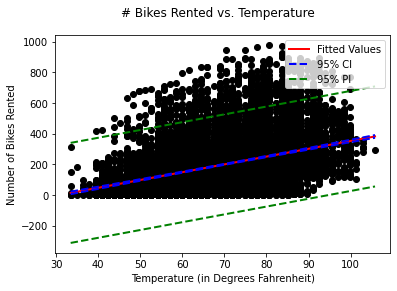

In [53]:
##part d -- In Python
beta0_hatTemp = modelTemp.params[0]
sebeta0Temp = modelTemp.bse[0]
x0Temp = np.linspace(temp.min(), temp.max(), 100)
xpTemp = np.linspace(temp.min(), temp.max(), 100)
mu_hatTemp = beta0_hatTemp + beta1_hatTemp * temp
mu0_hatTemp = beta0_hatTemp +beta1_hatTemp *x0Temp
n = bikes.shape[0]
crit_val = tdist.ppf(0.975, df = n-2)
sxxTemp = (n) * np.var(temp)
sigma_hatTemp = np.sqrt(np.sum((count - mu_hatTemp)**2)/modelTemp.df_resid)
se_mu0Temp = sigma_hatTemp * np.sqrt((1/n) + ((x0Temp-np.mean(temp))**2/sxxTemp))
low_CLTemp = mu0_hatTemp - crit_val * se_mu0Temp
upp_CLTemp = mu0_hatTemp + crit_val * se_mu0Temp
temp_pred = np.linspace(temp.min(), temp.max(), 100)
temp_pred_int = sm.tools.tools.add_constant(temp_pred)
count_predTemp = modelTemp.predict(temp_pred_int)
yp_hatTemp = beta0_hatTemp + beta1_hatTemp * xpTemp
se_ypTemp = sigma_hatTemp * np.sqrt(1 + (1/n) + ((xpTemp-np.mean(temp))**2/sxxTemp))
low_PLTemp = yp_hatTemp - crit_val * se_ypTemp
upp_PLTemp = yp_hatTemp + crit_val * se_ypTemp
fig = plt.figure()
plt.scatter(temp, count, c = "black")
fig.suptitle("# Bikes Rented vs. Temperature")
plt.ylabel("Number of Bikes Rented")
plt.xlabel("Temperature (in Degrees Fahrenheit)")
fitted_lineTemp, = plt.plot(temp_pred, count_predTemp, '-', color = "red", linewidth = 2, label = "Fitted Values")
low_lineTemp, = plt.plot(x0Temp, low_CLTemp, '--', color = "blue", linewidth = 2, label = "95% CI")
upp_lineTemp, = plt.plot(x0Temp, upp_CLTemp, '--', color = "blue", linewidth = 2, label = "95% CI")
lowPI_lineTemp, = plt.plot(xpTemp, low_PLTemp, '--', color = "green", linewidth = 2, label = "95% PI") 
uppPI_lineTemp, = plt.plot(xpTemp, upp_PLTemp, '--', color = "green", linewidth = 2, label = "95% PI") 
legend = plt.legend(handles = [fitted_lineTemp, low_lineTemp, lowPI_lineTemp], loc = 1)

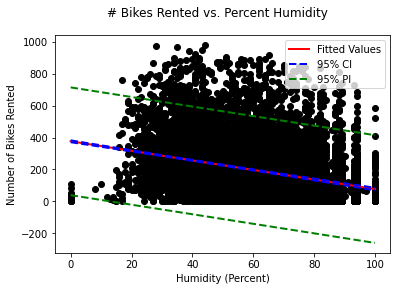

In [54]:
beta0_hatHum = modelHumidity.params[0]
sebeta0Hum = modelHumidity.bse[0]
x0Hum = np.linspace(humidity.min(), humidity.max(), 100)
xpHum = np.linspace(humidity.min(), humidity.max(), 100)
mu_hatHum = beta0_hatHum + beta1_hatHum * humidity
mu0_hatHum = beta0_hatHum +beta1_hatHum *x0Hum
sxxHum = (n) * np.var(humidity)
sigma_hatHum = np.sqrt(np.sum((count - mu_hatHum)**2)/modelHumidity.df_resid)
se_mu0Hum = sigma_hatHum * np.sqrt((1/n) + ((x0Temp-np.mean(humidity))**2/sxxHum))
low_CLHum = mu0_hatHum - crit_val * se_mu0Hum
upp_CLHum = mu0_hatHum + crit_val * se_mu0Hum
humidity_pred = np.linspace(humidity.min(), humidity.max(), 100)
humidity_pred_int = sm.tools.tools.add_constant(humidity_pred)
count_predHum = modelHumidity.predict(humidity_pred_int)
yp_hatHum = beta0_hatHum + beta1_hatHum * xpHum
se_ypHum = sigma_hatHum * np.sqrt(1 + (1/n) + ((xpHum-np.mean(humidity))**2/sxxHum))
low_PLHum = yp_hatHum - crit_val * se_ypHum
upp_PLHum = yp_hatHum + crit_val * se_ypHum
fig = plt.figure()
plt.scatter(humidity, count, c = "black")
fig.suptitle("# Bikes Rented vs. Percent Humidity")
plt.ylabel("Number of Bikes Rented")
plt.xlabel("Humidity (Percent)")
fitted_lineHum, = plt.plot(humidity_pred, count_predHum, '-', color = "red", linewidth = 2, label = "Fitted Values")
low_lineHum, = plt.plot(x0Hum, low_CLHum, '--', color = "blue", linewidth = 2, label = "95% CI")
upp_lineHum, = plt.plot(x0Hum, upp_CLHum, '--', color = "blue", linewidth = 2, label = "95% CI")
lowPI_lineHum, = plt.plot(xpHum, low_PLHum, '--', color = "green", linewidth = 2, label = "95% PI") 
uppPI_lineHum, = plt.plot(xpHum, upp_PLHum, '--', color = "green", linewidth = 2, label = "95% PI") 
legend = plt.legend(handles = [fitted_lineHum, low_lineHum, lowPI_lineHum], loc = 1)

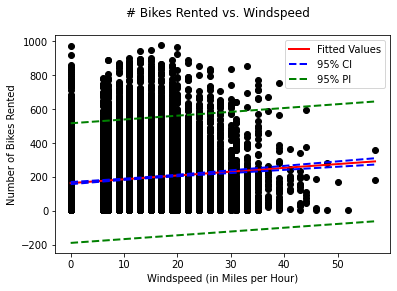

In [55]:
beta0_hatWind = modelWindspeed.params[0]
sebeta0Wind = modelWindspeed.bse[0]
x0Wind = np.linspace(windspeed.min(), windspeed.max(), 100)
xpWind = np.linspace(windspeed.min(), windspeed.max(), 100)
mu_hatWind = beta0_hatWind + beta1_hatWind * windspeed
mu0_hatWind = beta0_hatWind +beta1_hatWind *x0Wind
sxxWind = (n) * np.var(windspeed)
sigma_hatWind = np.sqrt(np.sum((count - mu_hatWind)**2)/modelWindspeed.df_resid)
se_mu0Wind = sigma_hatWind * np.sqrt((1/n) + ((x0Wind-np.mean(windspeed))**2/sxxWind))
low_CLWind = mu0_hatWind - crit_val * se_mu0Wind
upp_CLWind = mu0_hatWind + crit_val * se_mu0Wind
windspeed_pred = np.linspace(windspeed.min(), windspeed.max(), 100)
windspeed_pred_int = sm.tools.tools.add_constant(windspeed_pred)
count_predWind = modelWindspeed.predict(windspeed_pred_int)
yp_hatWind = beta0_hatWind + beta1_hatWind * xpWind
se_ypWind = sigma_hatWind * np.sqrt(1 + (1/n) + ((xpWind-np.mean(windspeed))**2/sxxWind))
low_PLWind = yp_hatWind - crit_val * se_ypWind
upp_PLWind = yp_hatWind + crit_val * se_ypWind
fig = plt.figure()
plt.scatter(windspeed, count, c = "black")
fig.suptitle("# Bikes Rented vs. Windspeed")
plt.ylabel("Number of Bikes Rented")
plt.xlabel("Windspeed (in Miles per Hour)")
fitted_lineWind, = plt.plot(windspeed_pred, count_predWind, '-', color = "red", linewidth = 2, label = "Fitted Values")
low_lineWind, = plt.plot(x0Wind, low_CLWind, '--', color = "blue", linewidth = 2, label = "95% CI")
upp_lineWind, = plt.plot(x0Wind, upp_CLWind, '--', color = "blue", linewidth = 2, label = "95% CI")
lowPI_lineWind, = plt.plot(xpWind, low_PLWind, '--', color = "green", linewidth = 2, label = "95% PI") 
uppPI_lineWind, = plt.plot(xpWind, upp_PLWind, '--', color = "green", linewidth = 2, label = "95% PI") 
legend = plt.legend(handles = [fitted_lineWind, low_lineWind, lowPI_lineWind], loc = 1)

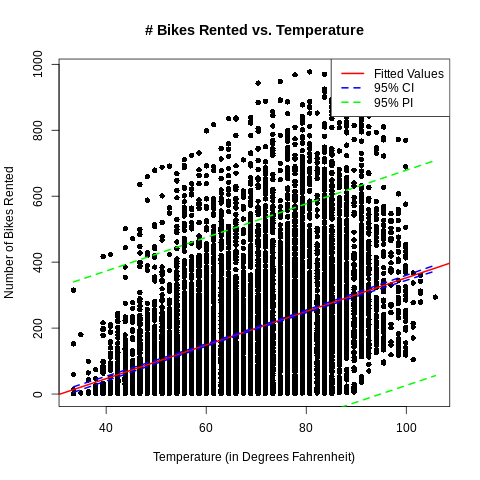

In [56]:
%%R
##part d -- in R
beta0_hatTemp <- summaryTemp$coefficients[1,1]
se_beta0Temp <- summaryTemp$coefficients[1,2]
crit_val <- qt(p = 0.975, df = n-2, lower.tail = TRUE)
x0Temp <- seq(from = min(temp), to = max(temp), length.out = 100)
mu_hatTemp <- beta0_hatTemp + beta1_hatTemp * temp
mu0_hatTemp <- beta0_hatTemp + beta1_hatTemp * x0Temp
n <- dim(bikes)[1]
sxxTemp <- (n) * var(temp)
sigma_hatTemp <- sqrt(sum((count - mu_hatTemp)^2)/modelTemp$df.residual)
se_mu0Temp <- sigma_hatTemp * sqrt((1/n) + ((x0Temp-mean(temp))^2/sxxTemp))
low_CLTemp <- mu0_hatTemp - crit_val * se_mu0Temp
upp_CLTemp <- mu0_hatTemp + crit_val * se_mu0Temp
xpTemp <- seq(from = min(temp), to = max(temp), length.out = 100)
yp_hatTemp <- beta0_hatTemp + beta1_hatTemp * xpTemp
se_ypTemp <- sigma_hatTemp * sqrt(1 + (1/n) + ((xpTemp-mean(temp))^2/sxxTemp))
low_PLTemp <- yp_hatTemp - crit_val * se_ypTemp
upp_PLTemp <- yp_hatTemp + crit_val * se_ypTemp
plot(temp, count, ylab = "Number of Bikes Rented", xlab = "Temperature (in Degrees Fahrenheit)", main = "# Bikes Rented vs. Temperature", pch = 16)
abline(modelTemp, col = "red", lwd = 2)
lines(x0Temp, low_CLTemp, col = "blue", lwd = 2, lty = 2)
lines(x0Temp, upp_CLTemp, col = "blue", lwd = 2, lty = 2)
lines(xpTemp, low_PLTemp, col = "green", lwd = 2, lty = 2)
lines(xpTemp, upp_PLTemp, col = "green", lwd = 2, lty = 2)
legend("topright", legend = c("Fitted Values", "95% CI", "95% PI"), lwd = c(2,2,2), lty = c(1,2,2), col = c("red", "blue", "green"))

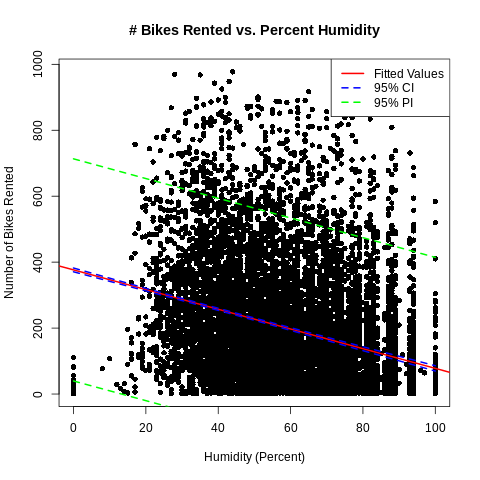

In [57]:
%%R
beta0_hatHum <- summaryHumidity$coefficients[1,1]
se_beta0Hum <- summaryHumidity$coefficients[1,2]
x0Hum <- seq(from = min(humidity), to = max(humidity), length.out = 100)
mu_hatHum <- beta0_hatHum + beta1_hatHum * humidity
mu0_hatHum <- beta0_hatHum + beta1_hatHum * x0Hum
sxxHum <- (n) * var(humidity)
sigma_hatHum <- sqrt(sum((count - mu_hatHum)^2)/modelHumidity$df.residual)
se_mu0Hum <- sigma_hatHum * sqrt((1/n) + ((x0Temp-mean(humidity))^2/sxxHum))
low_CLHum <- mu0_hatHum - crit_val * se_mu0Hum
upp_CLHum <- mu0_hatHum + crit_val * se_mu0Hum
xpHum <- seq(from = min(humidity), to = max(humidity), length.out = 100)
yp_hatHum <- beta0_hatHum + beta1_hatHum * xpHum
se_ypHum <- sigma_hatHum * sqrt(1 + (1/n) + ((xpHum-mean(humidity))^2/sxxHum))
low_PLHum <- yp_hatHum - crit_val * se_ypHum
upp_PLHum <- yp_hatHum + crit_val * se_ypHum
plot(humidity, count, ylab = "Number of Bikes Rented", xlab = "Humidity (Percent)", main = "# Bikes Rented vs. Percent Humidity", pch = 16)
abline(modelHumidity, col = "red", lwd = 2)
lines(x0Hum, low_CLHum, col = "blue", lwd = 2, lty = 2)
lines(x0Hum, upp_CLHum, col = "blue", lwd = 2, lty = 2)
lines(xpHum, low_PLHum, col = "green", lwd = 2, lty = 2)
lines(xpHum, upp_PLHum, col = "green", lwd = 2, lty = 2)
legend("topright", legend = c("Fitted Values", "95% CI", "95% PI"), lwd = c(2,2,2), lty = c(1,2,2), col = c("red", "blue", "green"))

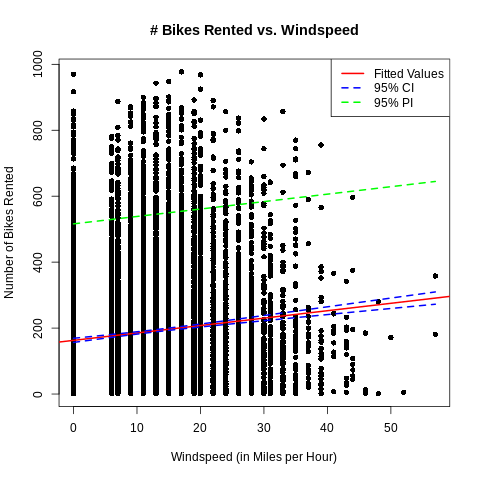

In [58]:
%%R
beta0_hatWind <- summaryWindspeed$coefficients[1,1]
se_beta0Wind <- summaryWindspeed$coefficients[1,2]
x0Wind <- seq(from = min(windspeed), to = max(windspeed), length.out = 100)
mu_hatWind <- beta0_hatWind + beta1_hatWind * windspeed
mu0_hatWind <- beta0_hatWind + beta1_hatWind * x0Wind
sxxWind <- (n) * var(windspeed)
sigma_hatWind <- sqrt(sum((count - mu_hatWind)^2)/modelWindspeed$df.residual)
se_mu0Wind <- sigma_hatWind * sqrt((1/n) + ((x0Wind-mean(windspeed))^2/sxxWind))
low_CLWind <- mu0_hatWind - crit_val * se_mu0Wind
upp_CLWind <- mu0_hatWind + crit_val * se_mu0Wind
xpWind <- seq(from = min(windspeed), to = max(windspeed), length.out = 100)
yp_hatWind <- beta0_hatWind + beta1_hatWind * xpWind
se_ypWind <- sigma_hatWind * sqrt(1 + (1/n) + ((xpWind-mean(windspeed))^2/sxxWind))
low_PLWind <- yp_hatWind - crit_val * se_ypWind
upp_PLWind <- yp_hatWind + crit_val * se_ypWind
plot(windspeed, count, ylab = "Number of Bikes Rented", xlab = "Windspeed (in Miles per Hour)", main = "# Bikes Rented vs. Windspeed", pch = 16)
abline(modelWindspeed, col = "red", lwd = 2)
lines(x0Wind, low_CLWind, col = "blue", lwd = 2, lty = 2)
lines(x0Wind, upp_CLWind, col = "blue", lwd = 2, lty = 2)
lines(xpWind, low_PLWind, col = "green", lwd = 2, lty = 2)
lines(xpWind, upp_PLWind, col = "green", lwd = 2, lty = 2)
legend("topright", legend = c("Fitted Values", "95% CI", "95% PI"), lwd = c(2,2,2), lty = c(1,2,2), col = c("red", "blue", "green"))

In [59]:
##part e -- in Python
##i
mu_pTemp = beta0_hatTemp + beta1_hatTemp * 70
semu_pTemp = sigma_hatTemp * np.sqrt(1 + (1/n) + ((70-np.mean(temp))**2 /sxxTemp)) 
low_pl70 = mu_pTemp - crit_val * semu_pTemp
hi_pl70 = mu_pTemp + crit_val * semu_pTemp

print("If the temperature outside were 70*F, we would predict ",np.round(mu_pTemp, 3), " bike rentals. A 95% prediction interval for this estimate is (",np.round(low_pl70,3), ", ", np.round(hi_pl70,3), ").")
temp_pred = modelTemp.predict(exog = [1,70])
blah, temp_lo, temp_hi = pi(modelTemp, exog = [1,70], weights = 1)
print("Temperature: ", [temp_pred, temp_lo, temp_hi])


If the temperature outside were 70*F, we would predict  199.647  bike rentals. A 95% prediction interval for this estimate is ( -126.669 ,  525.962 ).
Temperature:  [array([199.64651201]), array([-126.66870045]), array([525.96172448])]


In [60]:
##ii
mu_pWind = beta0_hatWind + beta1_hatWind * 10
semu_pWind = sigma_hatWind * np.sqrt(1 + (1/n) + ((10-np.mean(windspeed))**2/sxxWind)) 
low_pl10 = mu_pWind - crit_val * semu_pWind
hi_pl10 = mu_pWind + crit_val * semu_pWind
print("If the wind was blowing 10 mph, we would predict ",np.round(mu_pWind, 3), " bike rentals. A 95% prediction interval for this estimate is (", np.round(low_pl10,3), ", ", np.round(hi_pl10,3), ").")

If the wind was blowing 10 mph, we would predict  185.278  bike rentals. A 95% prediction interval for this estimate is ( -168.003 ,  538.56 ).


In [61]:
##iii
mu_pHum = beta0_hatHum + beta1_hatHum * 40
semu_pHum = sigma_hatHum * np.sqrt(1 + (1/n) + ((40-np.mean(humidity))**2/sxxHum))
low_pl40 = mu_pHum - crit_val * semu_pHum
hi_pl40 = mu_pHum + crit_val * semu_pHum
print("If the relative humidity was 40%, we would predict ",np.round(mu_pHum, 3), " bike rentals. A 95% prediction interval for this estimate is (", np.round(low_pl40,3), ", ", np.round(hi_pl40,3), ").")

If the relative humidity was 40%, we would predict  256.955  bike rentals. A 95% prediction interval for this estimate is ( -79.815 ,  593.725 ).


In [62]:
%%R
##part e -- in R
##i
mu_pTemp <- beta0_hatTemp + beta1_hatTemp * 70
semu_pTemp <- sigma_hatTemp * sqrt(1 + (1/n) + ((70-mean(temp))**2/sxxTemp)) 
low_pl70 <- mu_pTemp - crit_val * semu_pTemp
hi_pl70 <- mu_pTemp + crit_val * semu_pTemp
cat("If the temperature outside were 70*F, we would predict",mu_pTemp, "bike rentals. A 95% prediction interval for this estimate is (", round(low_pl70,3), ", ", round(hi_pl70,3), ").")

If the temperature outside were 70*F, we would predict 199.6465 bike rentals. A 95% prediction interval for this estimate is ( -126.669 ,  525.962 ).

In [63]:
%%R
##ii
mu_pWind <- beta0_hatWind + beta1_hatWind * 10
semu_pWind <- sigma_hatWind * sqrt(1 + (1/n) + ((10-mean(windspeed))**2/sxxWind)) 
low_pl10 <- mu_pWind - crit_val * semu_pWind
hi_pl10 <- mu_pWind + crit_val * semu_pWind
cat("If the windspeed was 10 mph, we would predict",mu_pWind, "bike rentals. A 95% prediction interval for this estimate is (", round(low_pl10,3), ", ", round(hi_pl10,3), ").")

If the windspeed was 10 mph, we would predict 185.2781 bike rentals. A 95% prediction interval for this estimate is ( -168.003 ,  538.56 ).

In [64]:
%%R
##iii
mu_pHum <- beta0_hatHum + beta1_hatHum * 40
semu_pHum <- sigma_hatHum * sqrt(1 + (1/n) + ((40-mean(humidity))**2/sxxHum)) 
low_pl40 <- mu_pHum - crit_val * semu_pHum
hi_pl40 <- mu_pHum + crit_val * semu_pHum
cat("If the relative humidity was 40%, we would predict",mu_pHum, "bike rentals. A 95% prediction interval for this estimate is (", round(low_pl40,3), ", ", round(hi_pl40,3), ").")

If the relative humidity was 40%, we would predict 256.9549 bike rentals. A 95% prediction interval for this estimate is ( -79.815 ,  593.725 ).

In [65]:
##part f -- in Python
modelSeason = smf.ols("count ~ C(season)", data = bikes).fit()
summarySeason = modelSeason.summary()
##1 = spring, 2 = summer, 3 = fall, 4 = winter
summarySeason


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          6.16e-149
Time:                        21:43:42   Log-Likelihood:                -71701.
No. Observations:               10886   AIC:                         1.434e+05
Df Residuals:                   10882   BIC:                         1.434e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          116.3433      3.387     34.352      0.000     109.704     122.982
C(season)[T.2.0]    98.9081      4.769     20.740      0.000      89.560     108.256
C(season)[T.3.0]   118.0739      4.769     24.758      0.000     108.726     127.422
C(season)[T.4.0]    82.6450      4.769     17.331      0.000      73.298      91.992
==============================================================================
Omnibus:                     1896.059   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.509
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                       4.299   Cond. No.                         4.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
%%R
##part f -- in R
##1 = spring, 2 = summer, 3 = fall, 4 = winter
modelSeasons <- lm(count ~ factor(season), data = bikes)
summarySeasons <- summary(modelSeasons)
summarySeasons


Call:
lm(formula = count ~ factor(season), data = bikes)

Residuals:
    Min      1Q  Median      3Q     Max 
-233.42 -115.99  -38.99   87.58  749.01 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      116.343      3.387   34.35   <2e-16 ***
factor(season)2   98.908      4.769   20.74   <2e-16 ***
factor(season)3  118.074      4.769   24.76   <2e-16 ***
factor(season)4   82.645      4.769   17.33   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 175.5 on 10882 degrees of freedom
Multiple R-squared:  0.06132,	Adjusted R-squared:  0.06106 
F-statistic: 236.9 on 3 and 10882 DF,  p-value: < 2.2e-16



The model $y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i}$ relates the season to the number of bike rentals.

$\beta_0$, the intercept, is the parameter for bike rentals in spring, $\beta_1$ represents the change in the number of bike rentals between the spring and summer seasons. Similarly, $\beta_2$ is represents the difference in the number of bike rentals between spring and fall, and $\beta_3$ represents the change in hourly bike rentals between spring and winter.

The $x$'s are indicator, binary variables coded as a 1 if it is the season of the associated $\beta$ and 0 if it is not.

$E(\beta_0) = 116.343$

$E(\beta_1) = 215.251$

$E(\beta_2) = 247.417$

$E(\beta_3) = 198.988$

In [67]:
##part g -- Python
#1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy
modelWeather = smf.ols("count ~ C(weather)", data = bikes).fit()
summaryWeather = modelWeather.summary()
summaryWeather

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     65.53
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           5.48e-42
Time:                        21:43:43   Log-Likelihood:                -71948.
No. Observations:               10886   AIC:                         1.439e+05
Df Residuals:                   10882   BIC:                         1.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           205.2368      2.117     96.936      0.000     201.087     209.387
C(weather)[T.2.0]   -26.2813      3.982     -6.599      0.000     -34.087     -18.475
C(weather)[T.3.0]   -86.3905      6.482    -13.328      0.000     -99.096     -73.685
C(weather)[T.4.0]   -41.2368    179.567     -0.230      0.818    -393.221     310.748
==============================================================================
Omnibus:                     2029.021   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3492.480
Skew:                           1.221   Prob(JB):                         0.00
Kurtosis:                       4.319   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
%%R
##part g -- R
#1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy
modelWeather <- lm(count ~ factor(weather), data = bikes)
summaryWeather <- summary(modelWeather)
summaryWeather


Call:
lm(formula = count ~ factor(weather), data = bikes)

Residuals:
    Min      1Q  Median      3Q     Max 
-204.24 -142.24  -44.90   90.76  772.15 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       205.237      2.117  96.936  < 2e-16 ***
factor(weather)2  -26.281      3.982  -6.599 4.32e-11 ***
factor(weather)3  -86.390      6.482 -13.328  < 2e-16 ***
factor(weather)4  -41.237    179.567  -0.230    0.818    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 179.6 on 10882 degrees of freedom
Multiple R-squared:  0.01775,	Adjusted R-squared:  0.01747 
F-statistic: 65.53 on 3 and 10882 DF,  p-value: < 2.2e-16



This model $y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i}$ relates the weather outside to the number of bikes rented that hour.

$\beta_0$ is the parameter for bike rentals in nice weather, $\beta_1$ represents the difference in the number of bike rentals when it is cloudy outside as opposed to nice. $\beta_2$ is represents the change in the number of bike rentals between nice and rainy weather, and $\beta_3$ represents the change in hourly bike rentals between nice weather and stormy weather.

The $x$'s are indicator, binary variables coded as a 1 if the weather matches the associated $\beta$ and 0 if it does not.

$E(\beta_0) = 205.237$

$E(\beta_1) = 178.956$

$E(\beta_2) = 118.847$

$E(\beta_3) = 164$